In [14]:
using Plots; gr()
include("../julia/aguirregabiria_core.jl")

compute_fixed_point (generic function with 1 method)

In [15]:
#=
length_of_price_grid = 10
min_price, max_price = 0.5, 1.5
n_of_lambdas_per_dim = 3
max_iters            = 3
error_tol            = 1e-5
=#

length_of_price_grid = 20
min_price, max_price = 0.5, 1.5
n_of_lambdas_per_dim = 5
error_tol            = 1e-5

1.0e-5

In [16]:
price_grid = linspace(min_price, max_price, length_of_price_grid)

0.5:0.05263157894736842:1.5

In [17]:
simplex3d = generate_simplex_3dims(n_of_lambdas_per_dim)

15×3 Array{Float64,2}:
 0.0   0.0   1.0 
 0.0   0.25  0.75
 0.0   0.5   0.5 
 0.0   0.75  0.25
 0.0   1.0   0.0 
 0.25  0.0   0.75
 0.25  0.25  0.5 
 0.25  0.5   0.25
 0.25  0.75  0.0 
 0.5   0.0   0.5 
 0.5   0.25  0.25
 0.5   0.5   0.0 
 0.75  0.0   0.25
 0.75  0.25  0.0 
 1.0   0.0   0.0 

## Testing interpolation:

In [18]:
V0 = [2; ones(size(simplex3d,1)-1)]
#tmp_interpV = interpV(simplex3d, simplex3d[:,1])
tmp_interpV = interpV(simplex3d, V0)
methods(tmp_interpV)

# 1 method for generic function "(::interpolate_V)":
(::#interpolate_V#20)(x) in Main at /Users/cd/Projects/de_github/LearningModels/julia/aguirregabiria_core.jl:40

In [19]:
tmp_V = zeros(size(simplex3d,1))
for i in 1:size(simplex3d,1)
    tmp_V[i] = tmp_interpV(simplex3d[i,:])
end
hcat(V0, tmp_V)

15×2 Array{Float64,2}:
 2.0  2.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0

In [20]:
tmp_V = zeros(11,11)
for (i1, x1) in enumerate(0.0:0.1:1.0)
    for (i2, x2) in enumerate(0.0:0.1:1.0)
        tmp_V[i1,i2] = tmp_interpV([x1, x2])
    end
end
tmp_V

11×11 Array{Float64,2}:
 2.0  1.6  1.2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.6  1.2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.6
 1.2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.6  0.2
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.6  0.2  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.6  0.2  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.6  0.2  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.6  0.2  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  0.6  0.2  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.6  0.2  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.6  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.6  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

## Test `period_return()` :

In [21]:
include("../julia/aguirregabiria_core.jl")
# lambdas is always a vector of size n_of_lambdas_per_dim
test_lambdas = [0.2, 0.7, 0.1]

3-element Array{Float64,1}:
 0.2
 0.7
 0.1

In [22]:
constant_part = (price_grid - c) * exp(alpha + (sigma_eps^2)/2)

0.0:0.16211667625884374:3.080216848918031

In [23]:
summation = exp.(log.(price_grid)*betas_transition' * test_lambdas)
constant_part .* summation

20-element Array{Float64,1}:
 0.0     
 0.566615
 0.935309
 1.17663 
 1.33369 
 1.43378 
 1.49468 
 1.52829 
 1.54269 
 1.5435  
 1.5347  
 1.51911 
 1.49877 
 1.47515 
 1.44935 
 1.42216 
 1.39418 
 1.36583 
 1.33745 
 1.30927 

In [24]:
period_return([0.9, 1], test_lambdas)

2-element Array{Float64,1}:
 1.54703
 1.54011

## Test `dmd_transition_fs()`, `belief()`, `update_lambdas()` :

In [25]:
include("../julia/aguirregabiria_core.jl")
dmd_transition_fs(1, 1.2, 1)

3-element Array{Float64,1}:
 0.275406
 0.658411
 0.725042

In [26]:
belief(1, 1.2, 1, test_lambdas)

0.5884734620669838

In [27]:
update_lambdas(0.3, 2, 1, test_lambdas)

3-element Array{Float64,1}:
 6.88419e-5
 0.820924  
 0.179007  

## Build `V0` :

In [28]:
optimal_price = myopic_price(test_lambdas)

0.9504504504504505

In [29]:
function V_0(x) 
    optimal_price = myopic_price(x)
    return period_return(optimal_price, x)
end

V_0 (generic function with 1 method)

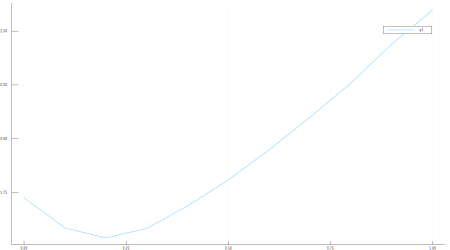

In [39]:
lambdas_selected = [[0.0, 0.5, 0.5],
                    [0.1, 0.5, 0.4],
                    [0.2, 0.5, 0.3],
                    [0.3, 0.5, 0.2],
                    [0.4, 0.5, 0.1],
                    [0.5, 0.4, 0.1],
                    [0.6, 0.3, 0.1],
                    [0.7, 0.2, 0.1],
                    [0.8, 0.1, 0.1],
                    [0.9, 0.1, 0.0],
                    [1.0, 0.0, 0.0]]

V_0_values = V_0.(lambdas_selected)
plot(0:0.1:1, V_0_values, size = (1800, 1000))

## Test `E0fV(Vguess, price_grid, lambda_weights)` :

In [40]:
new_lambdas(x) = update_lambdas(x, price_grid[1], ~, test_lambdas)
new_belief(x)  = belief(x, price_grid[1], ~, test_lambdas)
integrand(x) = V_0(new_lambdas(x)) * new_belief(x)

integrand (generic function with 1 method)

In [41]:
V_0(test_lambdas)

1.5464000419924135

In [42]:
logd_min, logd_max = -6, 2.3
integrand(1)

0.09156848098729656

In [43]:
A = quadgk(integrand, logd_min, logd_max, maxevals=250)[1]

0.8078026050330478

In [44]:
include("../julia/aguirregabiria_core.jl")
@time A = E0fV(V_0, price_grid, test_lambdas)

  0.441862 seconds (623.90 k allocations: 24.381 MiB, 2.40% gc time)


20-element Array{Float64,1}:
 0.807803
 0.95716 
 1.08021 
 1.19653 
 1.31751 
 1.42379 
 1.49327 
 1.52538 
 1.53486 
 1.53735 
 1.54227 
 1.55264 
 1.5677  
 1.58559 
 1.60463 
 1.62368 
 1.64201 
 1.65921 
 1.67509 
 1.68956 

## Test `bellman_operator(Vguess, price_grid, lambda_simplex)` :

In [45]:
include("../julia/aguirregabiria_core.jl")
@time T_V, policy = bellman_operator(V_0, price_grid, simplex3d)

  2.013118 seconds (6.49 M allocations: 218.115 MiB, 3.48% gc time)


(interpolate_V, [1.5, 1.5, 1.5, 1.39474, 1.23684, 1.5, 1.5, 1.5, 0.921053, 0.868421, 0.868421, 0.868421, 0.868421, 0.868421, 0.868421])

In [46]:
T_V([0.4, 0.2, 0.4])

3.1953917860936847

In [47]:
for i in 1:size(simplex3d, 1)
    println(T_V(simplex3d[i,:]))
end

3.747664691399904
3.4873902158753785
3.276647533937669
3.109491141280661
3.004168122556239
3.3595569286831006
3.1503154627726584
2.9845283443803012
2.97487024900338
3.1952336080777175
3.2405471984226946
3.2965291899843336
3.6456009998113093
3.714603848101699
4.169196620086549


## Compute fixed point:

In [52]:
include("../julia/aguirregabiria_core.jl")
@time V, policy, error = compute_fixed_point(V_0, price_grid, simplex3d)

Computed iterate 1 with error 22.9940
 !-- elapsed time: 1.705190684 seconds
Computed iterate 3 with error 18.1514
 !-- elapsed time: 2.273234487 seconds
Computed iterate 5 with error 14.4468
 !-- elapsed time: 2.038025278 seconds
Computed iterate 7 with error 11.5319
 !-- elapsed time: 2.032118729 seconds
Computed iterate 9 with error 9.2315
 !-- elapsed time: 1.964395453 seconds
Computed iterate 11 with error 7.3935
 !-- elapsed time: 2.972947361 seconds
Computed iterate 13 with error 5.9384
 !-- elapsed time: 1.975291541 seconds
Computed iterate 15 with error 4.7777
 !-- elapsed time: 2.45554387 seconds
Computed iterate 17 with error 3.8463
 !-- elapsed time: 1.956910755 seconds
Computed iterate 19 with error 3.0976
 !-- elapsed time: 1.927866813 seconds
Computed iterate 21 with error 2.4953
 !-- elapsed time: 1.916557877 seconds
Computed iterate 23 with error 2.0105
 !-- elapsed time: 1.921271287 seconds
Computed iterate 25 with error 1.6201
 !-- elapsed time: 1.928431689 seconds
C

(interpolate_V, [1.5, 1.5, 1.5, 1.39474, 1.23684, 1.5, 1.5, 1.5, 0.921053, 0.868421, 0.868421, 0.868421, 0.868421, 0.868421, 0.868421], 0.12224609370297301)

In [53]:
policy

15-element Array{Float64,1}:
 1.5     
 1.5     
 1.5     
 1.39474 
 1.23684 
 1.5     
 1.5     
 1.5     
 0.921053
 0.868421
 0.868421
 0.868421
 0.868421
 0.868421
 0.868421

## Plotting of results

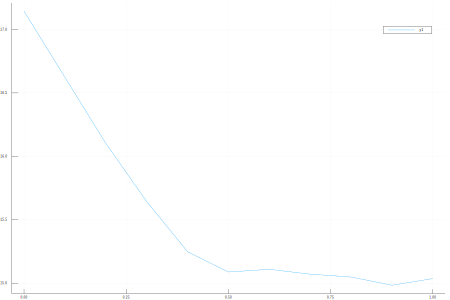

In [61]:
lambdas_selected = [[0.0, 0.5, 0.5],
                    [0.1, 0.5, 0.4],
                    [0.2, 0.5, 0.3],
                    [0.3, 0.5, 0.2],
                    [0.4, 0.5, 0.1],
                    [0.5, 0.4, 0.1],
                    [0.6, 0.3, 0.1],
                    [0.7, 0.2, 0.1],
                    [0.8, 0.1, 0.1],
                    [0.9, 0.1, 0.0],
                    [1.0, 0.0, 0.0]]

valuef_values = V.(lambdas_selected)
plot(0:0.1:1, valuef_values, size=(1800, 1200))

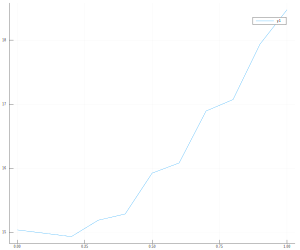

In [60]:
lambdas_selected = [[1.0, 0., 0.],
                    [0.9, 0.1, 0.],
                    [0.8, 0.2, 0.],
                    [0.7, 0.1, 0.1],
                    [0.6, 0.2, 0.2],
                    [0.5, 0.1, 0.4],
                    [0.4, 0.2, 0.4],
                    [0.3, 0.1, 0.6],
                    [0.2, 0.2, 0.6],
                    [0.1, 0.1, 0.8],
                    [0., 0.1, 0.9]]

valuef_values = V.(lambdas_selected)
plot(0:0.1:1, valuef_values, size=(1200, 1000))

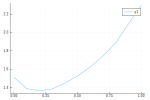

In [56]:
# -- original code --
#
# def optimized_period_profit(lambdas):
#     opt_p = myopic_price(lambdas)
#     E_β = src.exp_b_from_lambdas(lambdas, const.betas_transition)
#     logq = const.α + E_β*np.log(opt_p)
#
#     return (opt_p-const.c)*np.e**logq

function optimized_period_profit(lambdas)
    opt_p = myopic_price(lambdas)
    E_beta = dot(lambdas, betas_transition)
    logq  = alpha + E_beta*log(opt_p)
    
    return (opt_p-c)*exp(logq)
end

lambdas_selected_3d = [[0.0, 0.5, 0.5],
                        [0.1, 0.5, 0.4],
                        [0.2, 0.5, 0.2],
                        [0.3, 0.5, 0.2],
                        [0.4, 0.5, 0.1],
                        [0.5, 0.4, 0.1],
                        [0.6, 0.3, 0.1],
                        [0.7, 0.2, 0.1],
                        [0.8, 0.1, 0.1],
                        [0.9, 0.1, 0.0],
                        [1.0, 0.0, 0.0]]

profit_values = optimized_period_profit.(lambdas_selected_3d)
plot(0:0.1:1, profit_values)